# Popular Data Science Questions
In this project, I will be investigating the most popular data science questions from 2019 using the [Data Science Stack Exchange](https://datascience.stackexchange.com/) (DSSE) database. To acquire this data, I have used the [Stack Exchange Data Explorer](https://data.stackexchange.com/datascience/query/new) (SEDE), with the following query being run:
`SELECT * FROM posts
 WHERE CreationDate >= '2019-01-01 00:00:00' AND CreationDate < '2020-01-01 00:00:00';`
 This resulting output has been downloaded and will be used throughout this investigation.
 
 ## Import and Load Data into Dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

questions = pd.read_csv('Datasets/2019_questions.csv')
questions.head()

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,61336,2,NaN,61312.0,2019-10-06 14:28:41,NaN,1,NaN,<p><strong><em>Big Note:</em></strong> Unless ...,8878.0,...,2019-10-08 12:54:18,2019-10-08 12:54:18,NaN,NaN,NaN,5,NaN,NaN,NaN,CC BY-SA 4.0
1,61337,2,NaN,61248.0,2019-10-06 14:29:50,NaN,1,NaN,<p>Data needs to be modeled as a graph to use ...,1330.0,...,2019-10-06 15:20:32,2019-10-06 15:20:32,NaN,NaN,NaN,3,NaN,NaN,NaN,CC BY-SA 4.0
2,61339,2,NaN,58719.0,2019-10-06 15:13:46,NaN,0,NaN,<p>Perhaps this approach can work with you:</p...,43108.0,...,NaN,2019-10-06 15:13:46,NaN,NaN,NaN,1,NaN,NaN,NaN,CC BY-SA 4.0
3,61340,2,NaN,61308.0,2019-10-06 15:24:41,NaN,5,NaN,"<p>Short answer - No, CNNs are not <em>really<...",79934.0,...,2019-10-06 16:18:27,2019-10-06 16:18:27,NaN,NaN,NaN,2,NaN,NaN,NaN,CC BY-SA 4.0
4,61345,2,NaN,36135.0,2019-10-06 18:07:22,NaN,0,NaN,"<p>Linking <a href=""https://datascience.stacke...",82987.0,...,2019-10-06 18:19:38,2019-10-06 18:19:38,NaN,NaN,NaN,0,NaN,NaN,NaN,CC BY-SA 4.0


As this project is focusing on identifying the most popular questions, only the following columns will be necessary:
* `Id` - An identificaiton number for the post.
* `PostTypeId` - An identification number for the type of post.
* `CreationDate` - The date and time of creation of the post.
* `Score` - The post's score.
* `ViewCount` - How many times the post was viewed.
* `Tags` - What tags were used.
* `AnswerCount` - How many answers the question got
* `FavoriteCount` - How many times the question was favoured

With the exception of the tags column, the last few columns contain information about how popular the post is.

In [2]:
columns = ['Id', 'PostTypeId', 'CreationDate', 'Score', 'ViewCount', 'Tags', 'AnswerCount', 'FavoriteCount']
questions = questions[columns]
questions

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,61336,2,2019-10-06 14:28:41,1,NaN,NaN,NaN,NaN
1,61337,2,2019-10-06 14:29:50,1,NaN,NaN,NaN,NaN
2,61339,2,2019-10-06 15:13:46,0,NaN,NaN,NaN,NaN
3,61340,2,2019-10-06 15:24:41,5,NaN,NaN,NaN,NaN
4,61345,2,2019-10-06 18:07:22,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
14626,61326,2,2019-10-06 04:41:03,1,NaN,NaN,NaN,NaN
14627,61328,2,2019-10-06 07:22:38,0,NaN,NaN,NaN,NaN
14628,61329,2,2019-10-06 09:52:40,1,NaN,NaN,NaN,NaN
14629,61331,1,2019-10-06 11:42:59,0,793.0,<keras><tensorflow>,0.0,NaN


It can be seen that posts have varying post types, evidenced by the `PostTypeId`. When investigating SEDE, it reveals that post type 1 refers to question post types. As this is the type of post that is being focuseed on in this investigation, all other post types will be removed from the dataframe, with the column also being removed.

In [3]:
questions = questions[questions['PostTypeId'] == 1].copy()
questions.drop('PostTypeId', axis=1, inplace = True)
questions

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
5,61346,2019-10-06 19:19:33,2,8990.0,<scikit-learn><pca><dimensionality-reduction>,1.0,NaN
6,61348,2019-10-06 20:24:27,2,744.0,<python><tensorflow>,1.0,0.0
7,61349,2019-10-06 20:45:53,0,38.0,<machine-learning><dataset><correlation><data-...,1.0,NaN
11,61356,2019-10-07 05:05:39,0,86.0,<data-mining><data><preprocessing><geospatial>,0.0,NaN
13,61358,2019-10-07 05:23:59,4,3527.0,<deep-learning><lstm><rnn><activation-function>,2.0,NaN
...,...,...,...,...,...,...,...
14620,61316,2019-10-05 19:31:24,1,28.0,<machine-learning><classification><object-dete...,1.0,NaN
14623,61323,2019-10-06 02:34:05,0,1331.0,<classification><scikit-learn><pipelines>,1.0,NaN
14624,61324,2019-10-06 03:03:02,0,842.0,<python><keras><cnn><heatmap>,0.0,NaN
14629,61331,2019-10-06 11:42:59,0,793.0,<keras><tensorflow>,0.0,NaN


Now the dataframe is ready for exploration.
## Exploring the Dataframe

In [4]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
5,61346,2019-10-06 19:19:33,2,8990.0,<scikit-learn><pca><dimensionality-reduction>,1.0,NaN
6,61348,2019-10-06 20:24:27,2,744.0,<python><tensorflow>,1.0,0.0
7,61349,2019-10-06 20:45:53,0,38.0,<machine-learning><dataset><correlation><data-...,1.0,NaN
11,61356,2019-10-07 05:05:39,0,86.0,<data-mining><data><preprocessing><geospatial>,0.0,NaN
13,61358,2019-10-07 05:23:59,4,3527.0,<deep-learning><lstm><rnn><activation-function>,2.0,NaN


In [5]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6749 entries, 5 to 14630
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             6749 non-null   int64  
 1   CreationDate   6749 non-null   object 
 2   Score          6749 non-null   int64  
 3   ViewCount      6749 non-null   float64
 4   Tags           6749 non-null   object 
 5   AnswerCount    6749 non-null   float64
 6   FavoriteCount  160 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 421.8+ KB


The first issue that comes to light when calling the `.info()` method on `questions` is the large number of missing values in the `FavoriteCount` column, with ~98% of this column storing a `NaN` value. This will be resolved by filling in the missing values with 0s.

Secondly, when using the `.head()` method, it can be seen that the tags column appears to show multiple data values per row. Investigating this column would currently be quite tricky. Methods of cleaning this could include assessing each unique tag and creating a separate column for each. If a post is under any tags, it would have a 1 or 0 stored in the respective tag column to represent a `True` or `False` boolean value. To begin, I will convert it into a list format.

Finally, the data types for each column can be corrected and standardised, with the `CreationDate` being converted to a datetime object, and all remaining columns being converted to an integer type.

In [6]:
questions['FavoriteCount'] = questions['FavoriteCount'].fillna(0)
questions['FavoriteCount']
questions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6749 entries, 5 to 14630
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             6749 non-null   int64  
 1   CreationDate   6749 non-null   object 
 2   Score          6749 non-null   int64  
 3   ViewCount      6749 non-null   float64
 4   Tags           6749 non-null   object 
 5   AnswerCount    6749 non-null   float64
 6   FavoriteCount  6749 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 421.8+ KB


In [7]:
questions['Tags'] = questions['Tags'].str.replace('><', ',').str.replace('>', '').str.replace('<', '')
questions['Tags'] = questions['Tags'].str.split(',')
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
5,61346,2019-10-06 19:19:33,2,8990.0,"[scikit-learn, pca, dimensionality-reduction]",1.0,0.0
6,61348,2019-10-06 20:24:27,2,744.0,"[python, tensorflow]",1.0,0.0
7,61349,2019-10-06 20:45:53,0,38.0,"[machine-learning, dataset, correlation, data-...",1.0,0.0
11,61356,2019-10-07 05:05:39,0,86.0,"[data-mining, data, preprocessing, geospatial]",0.0,0.0
13,61358,2019-10-07 05:23:59,4,3527.0,"[deep-learning, lstm, rnn, activation-function]",2.0,0.0


In [8]:
questions['CreationDate'] = pd.to_datetime(questions['CreationDate'])
questions[['ViewCount', 'AnswerCount', 'FavoriteCount']] = questions[['ViewCount', 'AnswerCount', 'FavoriteCount']].astype('int64')
questions.info()
questions.reset_index(drop = True, inplace = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6749 entries, 5 to 14630
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             6749 non-null   int64         
 1   CreationDate   6749 non-null   datetime64[ns]
 2   Score          6749 non-null   int64         
 3   ViewCount      6749 non-null   int64         
 4   Tags           6749 non-null   object        
 5   AnswerCount    6749 non-null   int64         
 6   FavoriteCount  6749 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 421.8+ KB


## Most Used and Most Viewed
I can now focus on determining the most popular tags. This can be done by considering two different popularity proxies: for each tag, I can count how many times the tag has been used, and how many times a question with that tag has been viewed.
### Most Used

<Axes: >

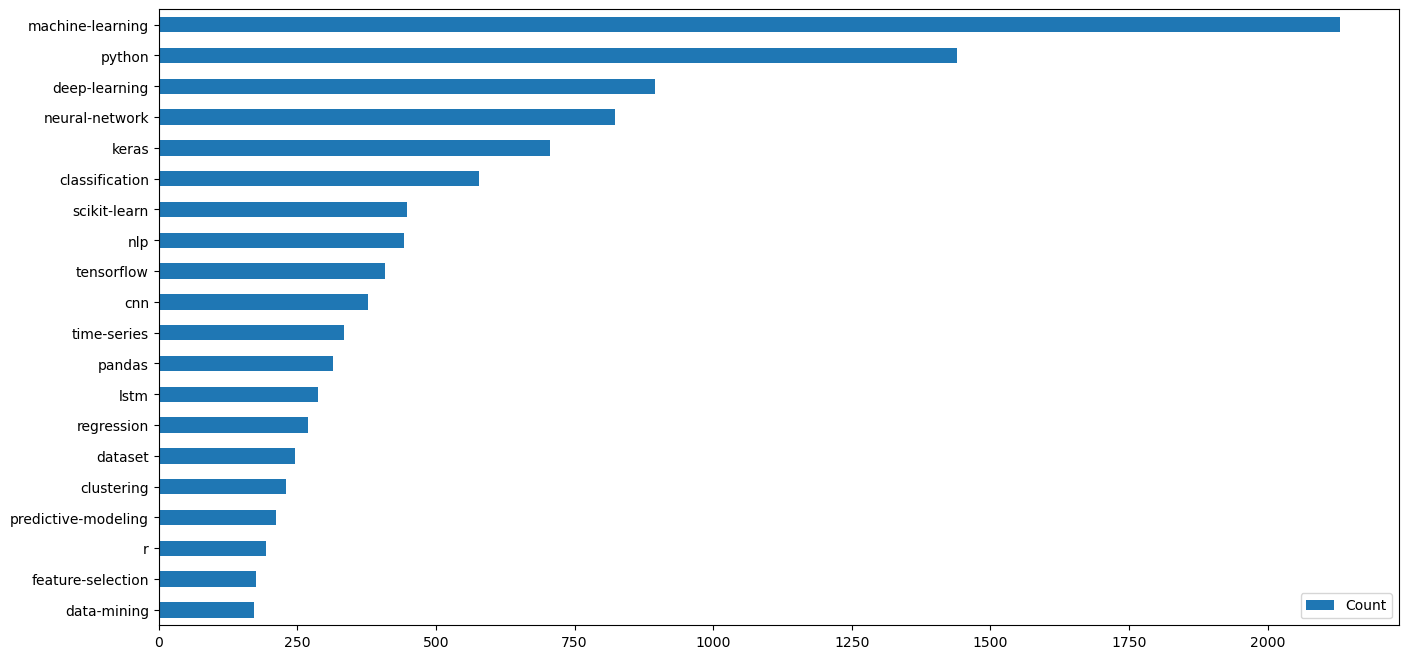

In [9]:
tag_count = {}

def tag_counting(row):
    for tag in row:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

questions['Tags'].apply(tag_counting)
tag_count = pd.DataFrame.from_dict(tag_count, orient = 'index', columns = ['Count'])
top_tags = tag_count.sort_values(by = 'Count', ascending = False).head(20)
top_tags.sort_values('Count').plot.barh(figsize = (16,8))

### Most Viewed

<Axes: >

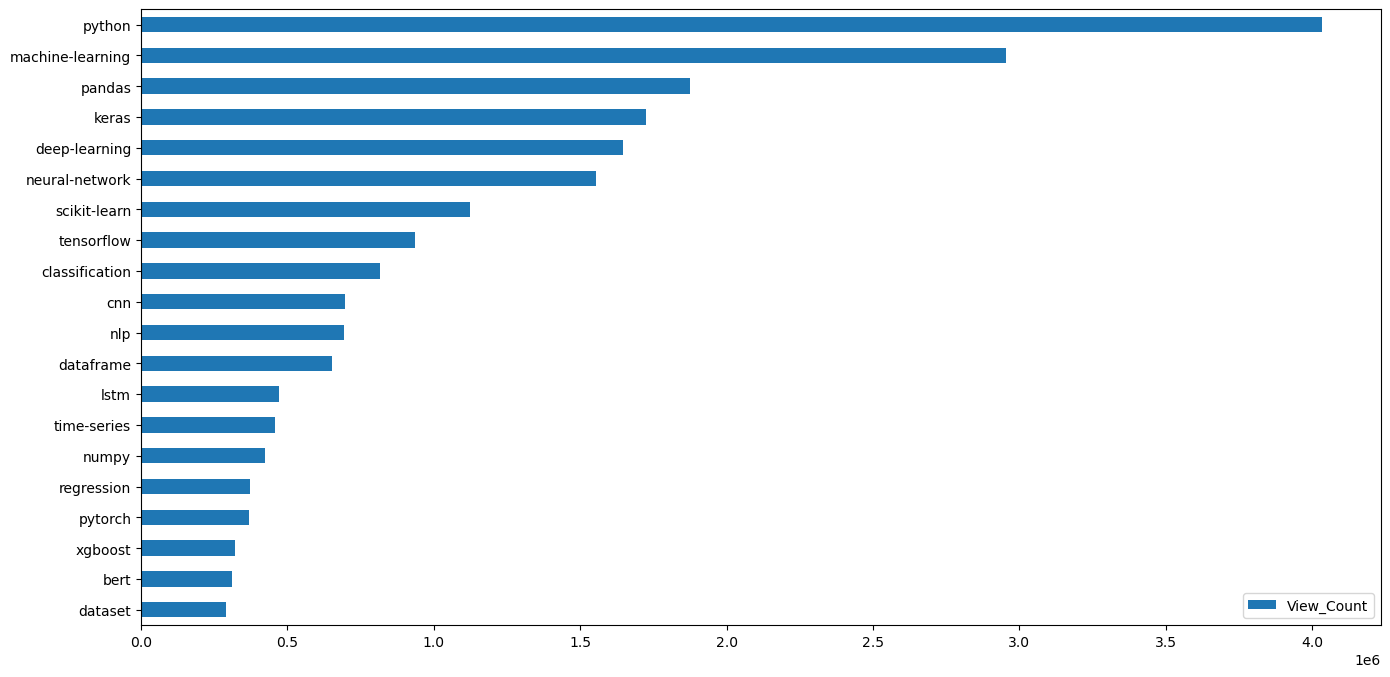

In [10]:
tag_view_count = {}

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']

tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient = 'index', columns = ['View_Count'])
top_viewed_tags = tag_view_count.sort_values('View_Count', ascending = False).head(20)
top_viewed_tags
top_viewed_tags.sort_values('View_Count').plot.barh(figsize = (16,8))

It can be seen that almost all tags that are most used are also the ones present in the list of most viewed tags, revealing that there are key tags that take up a large proportion of the tags used in Data Science questions. This furthers our understanding of the types of questions most frequently asked in relation to Data Science.

## Relations Between Tags
When assessing the tags in the two plots above, it can be noted that some tags are related. For example, `python` is related to `pandas`, as pandas is a Python library. As a result, writing about pandas means one is also writing about python, simultaneosly tackling two tags. I will attempt to find the pairs of tags most commonly found together.

In [11]:
from collections import Counter

tag_pair_count = Counter()

for tags in questions['Tags']:
    for i in range(len(tags)):
        for j in range(i + 1, len(tags)):
            tag1 = tags[i]
            tag2 = tags[j]
            tag_pair = tuple(sorted([tag1, tag2]))
            
            if tag1 in tags and tag2 in tags:
                tag_pair_count[tag_pair] += 1

tag_pair_count = dict(tag_pair_count)
#Reshape the dictionary into a list of key-value pairs
tag_pair_count = [{'Key': key, 'Value': value} for key, value in tag_pair_count.items()]
tag_pair_count = pd.DataFrame(tag_pair_count)
tag_pair_count.sort_values('Value', ascending = False).head(20)

,Key,Value
138,"(machine-learning, python)",402
191,"(deep-learning, machine-learning)",325
27,"(machine-learning, neural-network)",292
271,"(deep-learning, neural-network)",244
162,"(classification, machine-learning)",221
93,"(pandas, python)",218
75,"(keras, python)",204
78,"(python, scikit-learn)",199
195,"(deep-learning, keras)",196
22,"(keras, tensorflow)",196


In [12]:
#Verify the results with example
questions[questions['Tags'].apply(lambda tags: 'cnn' in tags and 'deep-learning' in tags)].shape[0]

120

The most used tags also appear to have the strongest relationships, as they are found in pairs the most. However, this could simply be due to the tags being used a lot, resulting in them being independently used together without there actually being a relation between the two.

Furthermore, as this approach only looks at relations between pairs of tags and not between multiple groups of tags, deeper relations cannot be identified. For example, it may be that when used together `dataset` and `scikit-learn` have a strong relation to `pandas`, but each lack this strong relationship independently. 

To solve this, the data mining technique known as association rules can be used. However, this won't be explored in this investigation.

One thing that can be confirmed from this output, is that deep learning content appears to be most popular as most of the top tags are closely related to this key machine learning theme.

### Alternative Method

In [13]:
all_tags = list(tag_count.index)
relations = pd.DataFrame(index=all_tags, columns=all_tags)
relations = relations.fillna(0)

for tags in questions['Tags']:
    relations.loc[tags, tags] += 1
relations

,scikit-learn,pca,dimensionality-reduction,python,tensorflow,machine-learning,dataset,correlation,data-analysis,data-mining,...,redshift,hive,data-indexing-techniques,multivariate-distribution,open-source,history,consumerweb,hashingvectorizer,naive-bayes-algorithim,normal-equation
scikit-learn,448,9,7,199,8,161,6,1,0,2,...,0,0,0,0,0,0,0,0,0,0
pca,9,74,27,11,1,21,2,0,1,2,...,0,0,0,0,0,0,0,0,0,0
dimensionality-reduction,7,27,59,12,0,16,2,0,0,3,...,0,0,0,0,0,0,0,0,0,0
python,199,11,12,1439,119,402,39,12,9,21,...,0,0,1,0,0,0,0,0,0,0
tensorflow,8,1,0,119,409,68,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
history,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
consumerweb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
hashingvectorizer,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
naive-bayes-algorithim,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [14]:
top_used_relations = relations.loc[top_tags.index, top_tags.index]
top_used_relations

,machine-learning,python,deep-learning,neural-network,keras,classification,scikit-learn,nlp,tensorflow,cnn,time-series,pandas,lstm,regression,dataset,clustering,predictive-modeling,r,feature-selection,data-mining
machine-learning,2130,402,325,292,147,221,161,108,68,95,104,57,43,101,76,52,98,48,81,85
python,402,1439,107,108,204,83,199,67,119,46,76,218,41,50,39,42,29,19,23,21
deep-learning,325,107,895,244,196,50,12,69,103,120,30,1,74,19,22,2,23,4,18,20
neural-network,292,108,244,823,192,54,20,27,81,96,25,1,48,40,18,4,8,6,7,4
keras,147,204,196,192,705,48,26,20,196,93,34,2,96,24,8,0,9,8,1,1
classification,221,83,50,54,48,577,41,34,17,14,19,3,13,30,20,10,23,8,18,18
scikit-learn,161,199,12,20,26,41,448,10,8,0,7,31,1,33,6,23,11,1,19,2
nlp,108,67,69,27,20,34,10,443,7,9,0,4,20,2,10,12,1,3,4,6
tensorflow,68,119,103,81,196,17,8,7,409,41,6,2,26,6,5,0,2,1,0,0
cnn,95,46,120,96,93,14,0,9,41,378,7,1,18,4,8,0,5,1,1,2


<Axes: >

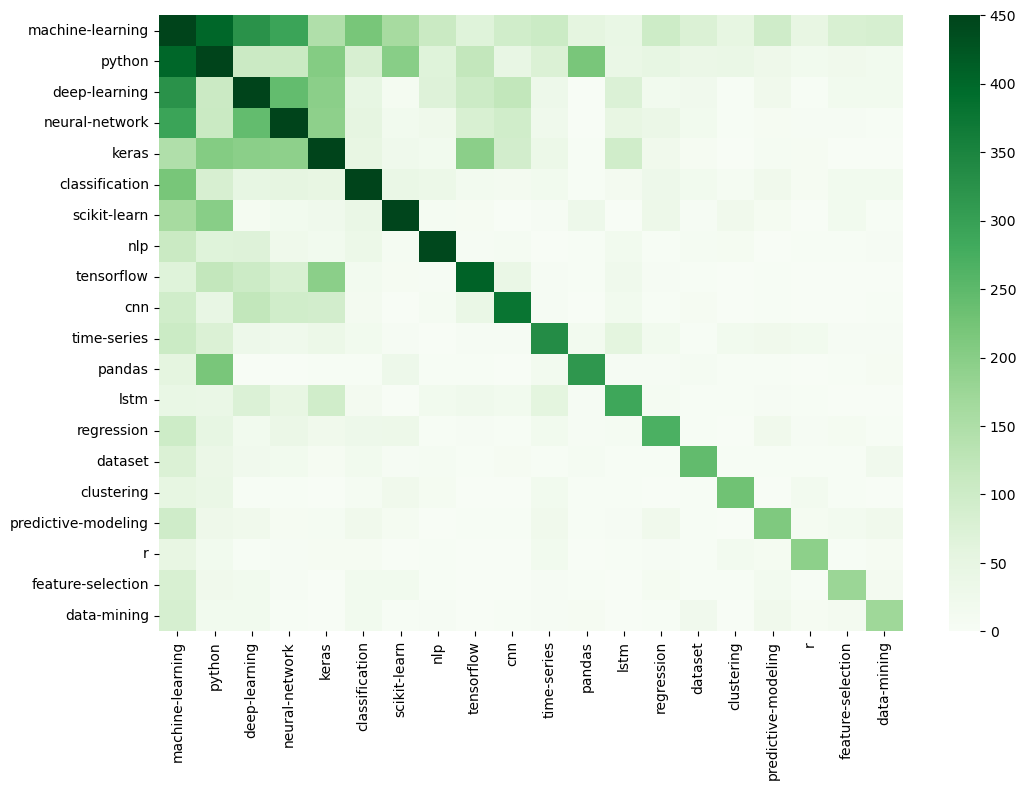

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(top_used_relations, cmap="Greens", annot=False, vmin = 0, vmax = 450)

## Deep Learning Assessment
In order to ensure deep learning questions are the most popular and relevant, as well as ensuring that it will continue to be the most popular, I will track the interest in deep learning across time. This will use all questions ever asked on [DSSE](https://datascience.stackexchange.com/) database. I will assess whether the questions is deep learning specific based on its tags and filter the table based on this.

In [21]:
all_questions = pd.read_csv('Datasets/all_question_tags.csv', parse_dates = ['CreationDate'])
all_questions['Tags'] = all_questions['Tags'].str.replace('><', ',').str.replace('>', '').str.replace('<', '')
all_questions['Tags'] = all_questions['Tags'].str.split(',')

all_questions

,Id,CreationDate,Tags
0,122443,2023-06-27 22:56:18,"[sequence, google, ngrams, bag-of-words]"
1,122450,2023-06-28 06:42:32,"[regression, prediction, overfitting, huggingf..."
2,122452,2023-06-28 11:05:10,"[predictive-modeling, statistics, survival-ana..."
3,122453,2023-06-28 14:36:56,"[python, deep-learning, keras]"
4,122455,2023-06-28 15:30:06,"[python, pandas]"
...,...,...,...
36380,34406,2018-07-13 04:47:29,[r]
36381,34408,2018-07-13 06:15:11,"[machine-learning, image-classification, image..."
36382,34409,2018-07-13 07:59:46,"[feature-selection, feature-extraction, prepro..."
36383,34412,2018-07-13 08:50:39,"[machine-learning, bigdata, online-learning]"


To determine which tags are deep learning related, I will assess which tags were related to deep learning based on the tags in `top_tags`. This results in the following list `['deep-learning', 'neural-network', 'keras', 'scikit-learn', 'tensorflow', 'cnn', 'lstm']`.

In [22]:
def deep_learning_check(tags):
    dl_tags = ['deep-learning', 'neural-network', 'keras', 'scikit-learn', 'tensorflow', 'cnn', 'lstm']
    
    for tag in tags:
        if tag in dl_tags:
            return 1
    return 0

all_questions['DeepLearning'] = all_questions['Tags'].apply(deep_learning_check)
all_questions

,Id,CreationDate,Tags,DeepLearning
0,122443,2023-06-27 22:56:18,"[sequence, google, ngrams, bag-of-words]",0
1,122450,2023-06-28 06:42:32,"[regression, prediction, overfitting, huggingf...",0
2,122452,2023-06-28 11:05:10,"[predictive-modeling, statistics, survival-ana...",0
3,122453,2023-06-28 14:36:56,"[python, deep-learning, keras]",1
4,122455,2023-06-28 15:30:06,"[python, pandas]",0
...,...,...,...,...
36380,34406,2018-07-13 04:47:29,[r],0
36381,34408,2018-07-13 06:15:11,"[machine-learning, image-classification, image...",0
36382,34409,2018-07-13 07:59:46,"[feature-selection, feature-extraction, prepro...",0
36383,34412,2018-07-13 08:50:39,"[machine-learning, bigdata, online-learning]",0


In [29]:
deep_learning = all_questions[all_questions['DeepLearning'] == 1]
deep_learning = deep_learning.drop(['DeepLearning'], axis = 1)
deep_learning = deep_learning.reset_index(drop=True)
deep_learning

,Id,CreationDate,Tags
0,122453,2023-06-28 14:36:56,"[python, deep-learning, keras]"
1,61346,2019-10-06 19:19:33,"[scikit-learn, pca, dimensionality-reduction]"
2,61348,2019-10-06 20:24:27,"[python, tensorflow]"
3,61358,2019-10-07 05:23:59,"[deep-learning, lstm, rnn, activation-function]"
4,61360,2019-10-07 06:04:34,"[keras, tensorflow, loss-function]"
...,...,...,...
12906,34370,2018-07-12 11:49:37,"[cnn, autoencoder, convolution]"
12907,34391,2018-07-12 18:12:18,"[neural-network, word2vec]"
12908,34396,2018-07-12 21:34:36,"[python, deep-learning, dataset]"
12909,34401,2018-07-13 00:26:57,"[machine-learning, neural-network, deep-learni..."


To assess the interest in deep learning across time, I will find the number of deep learning questions asked quarterly as well as the proportion of questions that fall under deep learning in a quarterly timeframe. I will use data up to 30th June 2023.

In [34]:
deep_learning = deep_learning[deep_learning['CreationDate'] < pd.to_datetime('2023-07-01 00:00:00')]
deep_learning = deep_learning.reset_index(drop=True)
deep_learning

,Id,CreationDate,Tags
0,122453,2023-06-28 14:36:56,"[python, deep-learning, keras]"
1,61346,2019-10-06 19:19:33,"[scikit-learn, pca, dimensionality-reduction]"
2,61348,2019-10-06 20:24:27,"[python, tensorflow]"
3,61358,2019-10-07 05:23:59,"[deep-learning, lstm, rnn, activation-function]"
4,61360,2019-10-07 06:04:34,"[keras, tensorflow, loss-function]"
...,...,...,...
12776,34370,2018-07-12 11:49:37,"[cnn, autoencoder, convolution]"
12777,34391,2018-07-12 18:12:18,"[neural-network, word2vec]"
12778,34396,2018-07-12 21:34:36,"[python, deep-learning, dataset]"
12779,34401,2018-07-13 00:26:57,"[machine-learning, neural-network, deep-learni..."


To identify the quarter a particular post falls into, I will create a new column that assigns the necessary quarter to each post.

In [35]:
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return '{}Q{}'.format(year, quarter)

deep_learning['Quarter'] = deep_learning['CreationDate'].apply(fetch_quarter)
deep_learning

,Id,CreationDate,Tags,Quarter
0,122453,2023-06-28 14:36:56,"[python, deep-learning, keras]",23Q2
1,61346,2019-10-06 19:19:33,"[scikit-learn, pca, dimensionality-reduction]",19Q4
2,61348,2019-10-06 20:24:27,"[python, tensorflow]",19Q4
3,61358,2019-10-07 05:23:59,"[deep-learning, lstm, rnn, activation-function]",19Q4
4,61360,2019-10-07 06:04:34,"[keras, tensorflow, loss-function]",19Q4
...,...,...,...,...
12776,34370,2018-07-12 11:49:37,"[cnn, autoencoder, convolution]",18Q3
12777,34391,2018-07-12 18:12:18,"[neural-network, word2vec]",18Q3
12778,34396,2018-07-12 21:34:36,"[python, deep-learning, dataset]",18Q3
12779,34401,2018-07-13 00:26:57,"[machine-learning, neural-network, deep-learni...",18Q3


Posts can now be grouped by quarter to assess the number of posts per quarter.

In [65]:
dl_quarter_posts = deep_learning.pivot_table(index = 'Quarter', aggfunc = 'size')
dl_quarter_posts = pd.DataFrame(dl_quarter_posts, columns = ['count'])
dl_quarter_posts = dl_quarter_posts.reset_index()
dl_quarter_posts

,Quarter,count
0,14Q2,9
1,14Q3,13
2,14Q4,21
3,15Q1,17
4,15Q2,28
5,15Q3,45
6,15Q4,66
7,16Q1,110
8,16Q2,109
9,16Q3,159


To compare the rate of deep learning  posts relative to the database, I will apply the function to all posts.

In [38]:
all_questions['Quarter'] = all_questions['CreationDate'].apply(fetch_quarter)
all_questions

,Id,CreationDate,Tags,DeepLearning,Quarter
0,122443,2023-06-27 22:56:18,"[sequence, google, ngrams, bag-of-words]",0,23Q2
1,122450,2023-06-28 06:42:32,"[regression, prediction, overfitting, huggingf...",0,23Q2
2,122452,2023-06-28 11:05:10,"[predictive-modeling, statistics, survival-ana...",0,23Q2
3,122453,2023-06-28 14:36:56,"[python, deep-learning, keras]",1,23Q2
4,122455,2023-06-28 15:30:06,"[python, pandas]",0,23Q2
...,...,...,...,...,...
36380,34406,2018-07-13 04:47:29,[r],0,18Q3
36381,34408,2018-07-13 06:15:11,"[machine-learning, image-classification, image...",0,18Q3
36382,34409,2018-07-13 07:59:46,"[feature-selection, feature-extraction, prepro...",0,18Q3
36383,34412,2018-07-13 08:50:39,"[machine-learning, bigdata, online-learning]",0,18Q3


In [64]:
quarter_posts = all_questions.pivot_table(index = 'Quarter', aggfunc = 'size')
quarter_posts = pd.DataFrame(quarter_posts, columns = ['count'])
quarter_posts = quarter_posts.reset_index()
quarter_posts

,Quarter,count
0,14Q2,157
1,14Q3,188
2,14Q4,214
3,15Q1,188
4,15Q2,284
5,15Q3,310
6,15Q4,379
7,16Q1,510
8,16Q2,510
9,16Q3,574


In [75]:
quarterly = dl_quarter_posts.merge(quarter_posts, how = 'left', on = 'Quarter')
quarterly = quarterly.rename(columns = {'count_x': 'DeepLearningQuestions', 'count_y': 'TotalQuestions'})
quarterly['DeepLearningRate'] = quarterly['DeepLearningQuestions'] / quarterly['TotalQuestions']
quarterly

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
0,14Q2,9,157,0.057325
1,14Q3,13,188,0.069149
2,14Q4,21,214,0.098131
3,15Q1,17,188,0.090426
4,15Q2,28,284,0.098592
5,15Q3,45,310,0.145161
6,15Q4,66,379,0.174142
7,16Q1,110,510,0.215686
8,16Q2,109,510,0.213725
9,16Q3,159,574,0.277003


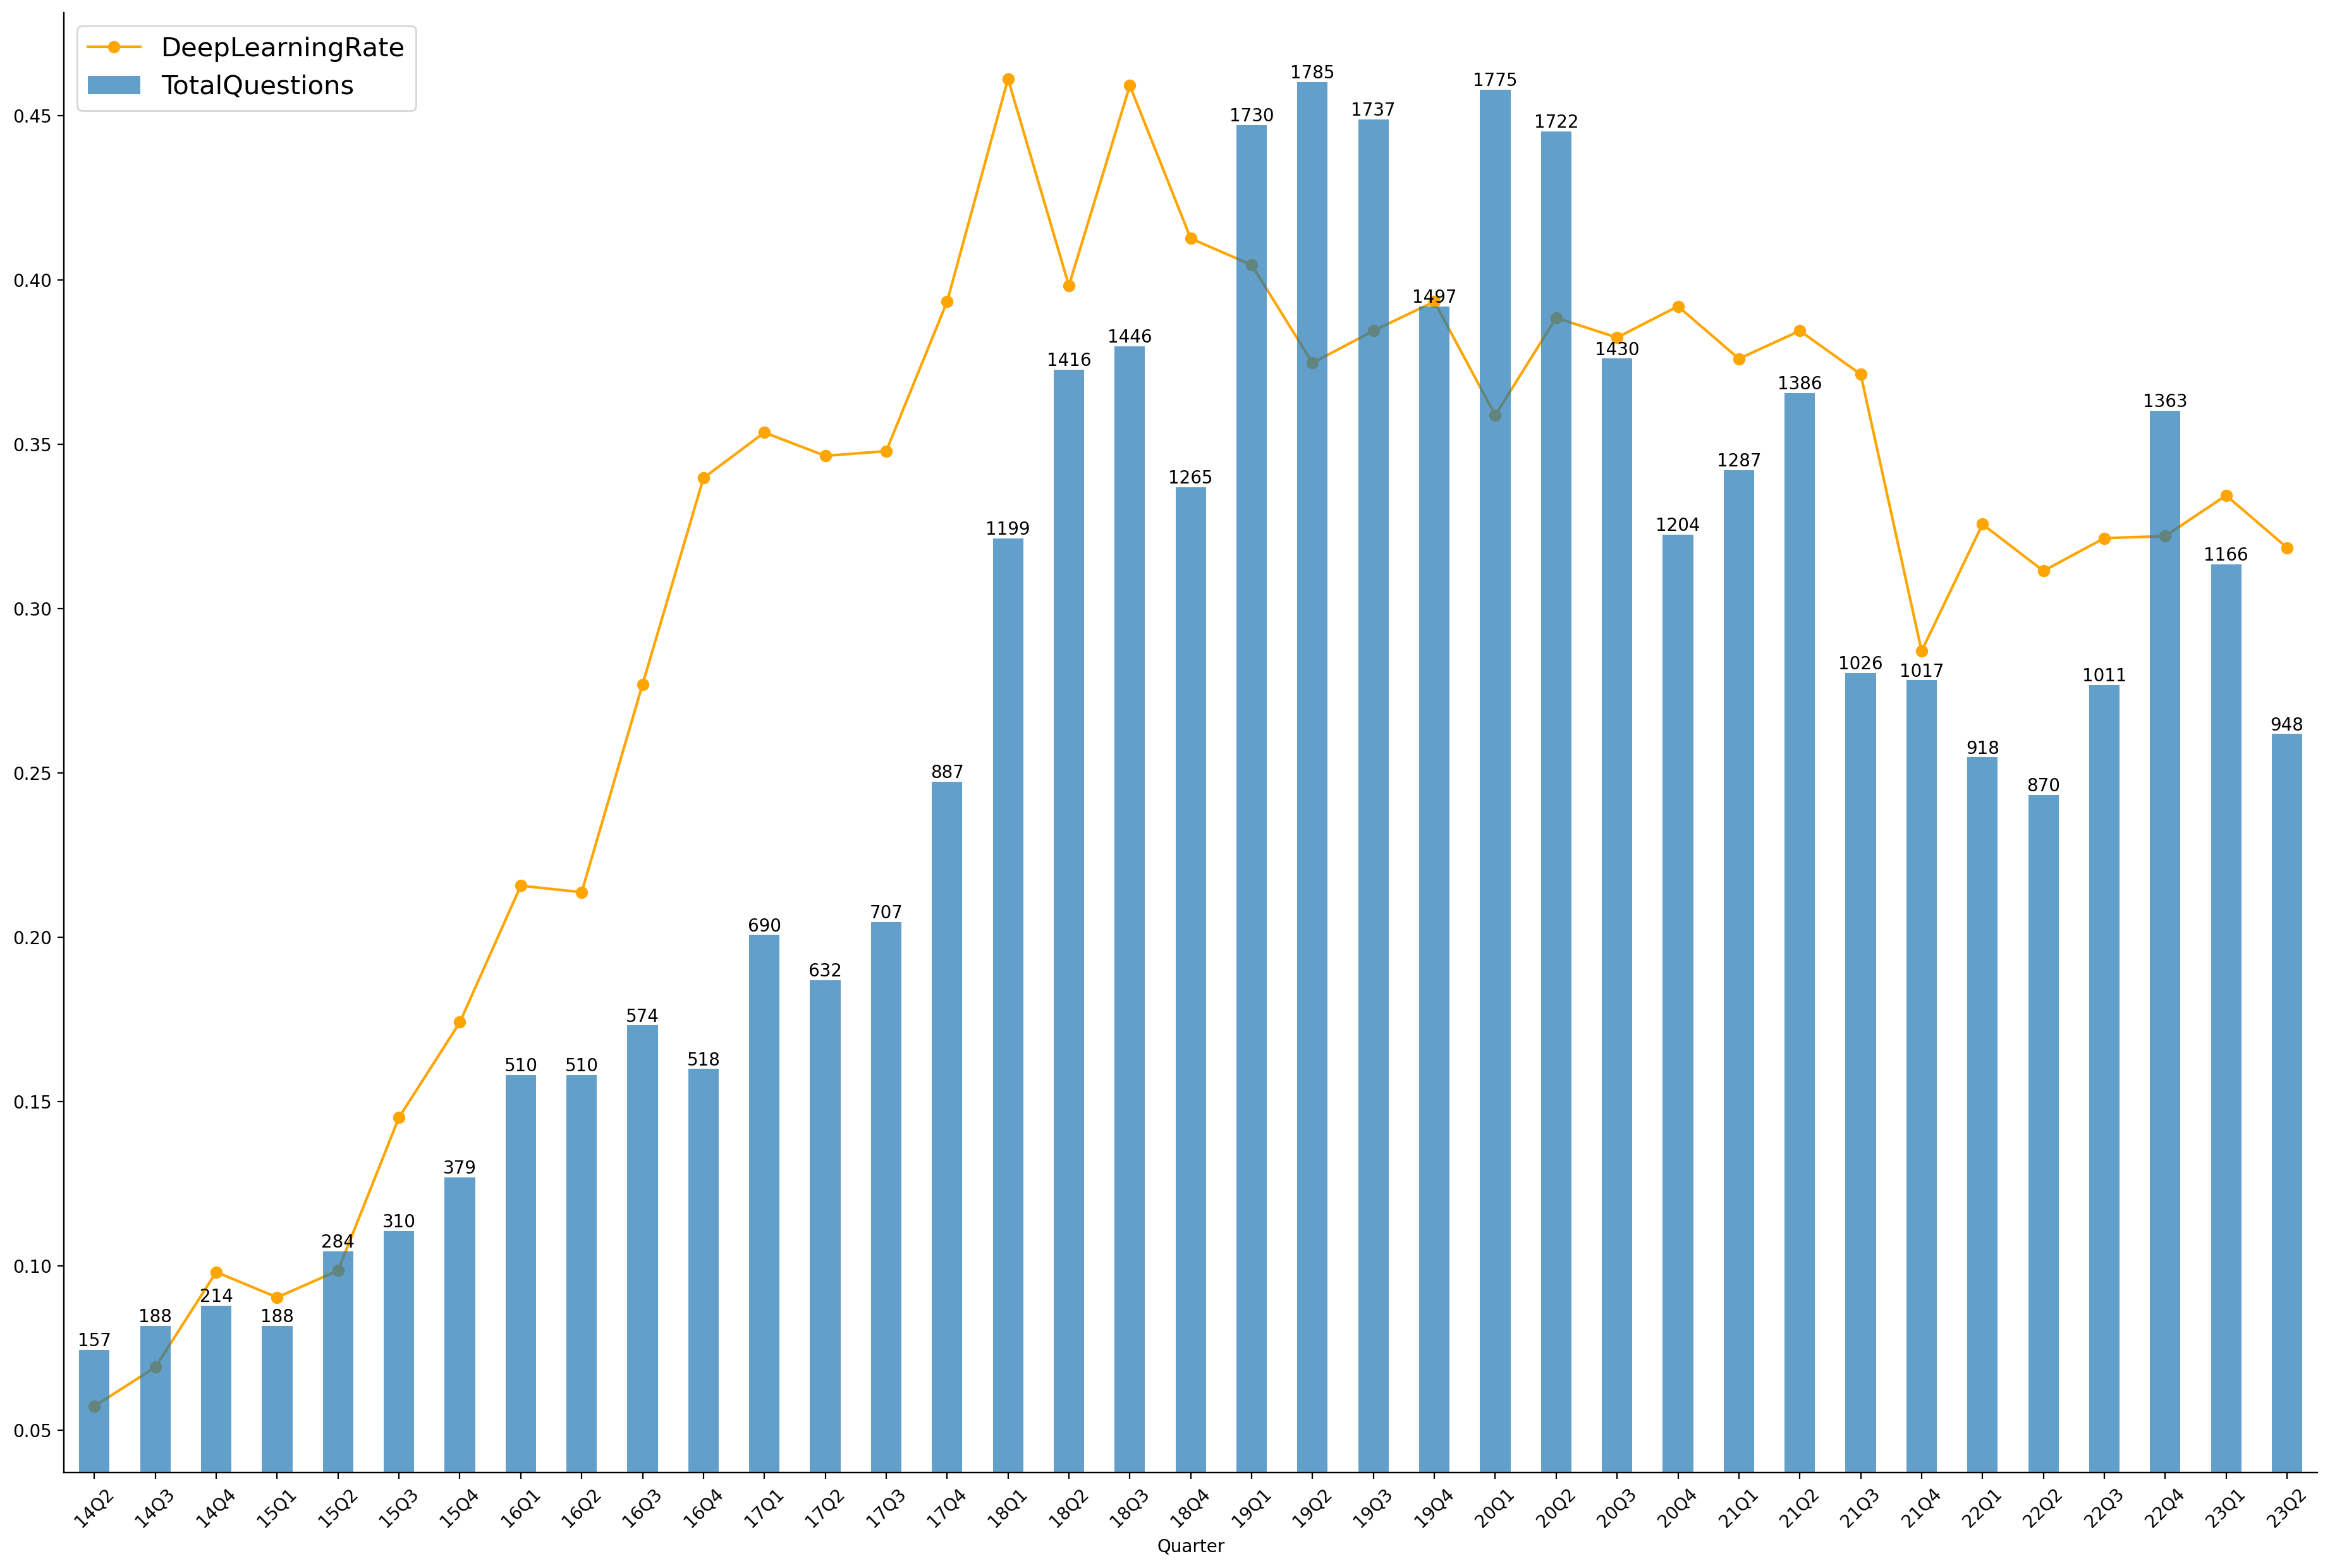

In [90]:
%config InlineBackend.figure_format ='retina'

ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(23,15)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in quarterly["TotalQuestions"].items():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=[label.replace(' (right)', '') for label in labels1 + labels2],
           loc="upper left", prop={"size": 15})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

It is clear that deep learning was a high-growth trend since the start of [DSSE](https://datascience.stackexchange.com/) before beginning to fall towards the end of 2018. Deep learning questions are now at their lowest point since the summer of 2016, and this may be due to many of the issues in deep learning for data scientist now being solved. As a result, users are more likely to visit an already posted question as opposed to asking a new question in the field of deep learning. However, further investigation would be required to confirm this hypothesis. This could be performed through assessing the view rate of deep learning questions over time. 